# Spaceship Titanic - Feature Engineering
---

## Imports

### Libraries

In [12]:
import pandas as pd 
import numpy as np
import pickle 
import seaborn as sns

### Data

In [3]:
train_data_full = pd.read_csv('../data/train.csv')
test_data_full = pd.read_csv('../data/test.csv')

## New Columns

In [4]:
train = train_data_full.copy()
test = test_data_full.copy()


### Split PassengerId

In [5]:
# Train set
train['group'] = [x.split('_')[0] for x in train.PassengerId]
train['group_num'] = [x.split('_')[1] for x in train.PassengerId]

# Test set
test['group'] = [x.split('_')[0] for x in test.PassengerId]
test['group_num'] = [x.split('_')[1] for x in test.PassengerId]


### Group Sizes

In [6]:
full = pd.concat([train, test])

In [9]:
train['group_size'] = [full['group'].value_counts()[x] for x in train['group']]

In [11]:
test['group_size'] = [full['group'].value_counts()[x] for x in test['group']]

<Axes: xlabel='group_size', ylabel='count'>

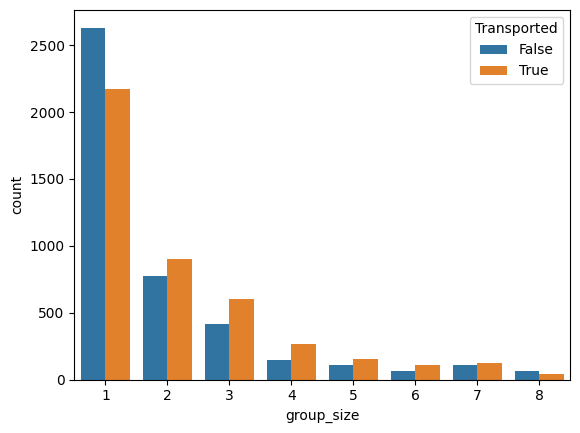

In [13]:
sns.countplot(data=train, x='group_size', hue='Transported')

Solo is much more likley to survive than larger groups

## Split Cabin 

In [20]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,group_num,group_size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,1


In [19]:
train['Cabin'].isnull().value_counts()

Cabin
False    8494
True      199
Name: count, dtype: int64

In [26]:
train['Cabin'].fillna('9999/9999/9999', inplace=True)
test['Cabin'].fillna('9999/9999/9999', inplace= True)


/tmp/ipykernel_7654/2501283456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Cabin'].fillna('9999/9999/9999', inplace= True)


In [27]:
train['cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])
train['cabin_num'] = train['Cabin'].apply(lambda x: x.split('/')[1])
train['cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])

test['cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
test['cabin_num'] = test['Cabin'].apply(lambda x: x.split('/')[1])
test['cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])

In [33]:
train.loc[train['cabin_deck'] == '9999', 'cabin_deck'] = np.nan
train.loc[train['cabin_num'] == '9999', 'cabin_num'] = np.nan
train.loc[train['cabin_side'] == '9999', 'cabin_side'] = np.nan

test.loc[test['cabin_deck'] == '9999', 'cabin_deck'] = np.nan
test.loc[test['cabin_num'] == '9999', 'cabin_num'] = np.nan
test.loc[test['cabin_side'] == '9999', 'cabin_side'] = np.nan


In [34]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,group,group_num,group_size,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,1,F,1,S
